# Tipsbet Analysis


## Initialisation

In [1]:
from tips import Tips
import datetime as dt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [109]:
plt.style.use('dark_background')
plt.style.use('seaborn')

## Load Data
The Tips module loads data all the data between the given start and end dates (both default to today if not given)

In [10]:
start = dt.datetime.now() - dt.timedelta(days=1000)
t = Tips(start)
t.full_dataset.Time.min()

Timestamp('2017-10-27 12:30:00.756813')

## Analysis

In [4]:
print(t.df.Time.dt.date.min(), '-', t.df.Time.dt.date.max())
print(t.df.Status.value_counts().to_string() + '\n')
print((t.df.Status.value_counts(normalize=True).round(4) * 100).to_string())

2017-10-28 - 2020-07-24
 W    9363
 L    3431
 ?      32

 W    73.00
 L    26.75
 ?     0.25


In [5]:
print(t.df.groupby('Sport').Status.value_counts().to_string())
print((t.df.groupby('Sport').Status.value_counts(normalize=True).round(4) * 100).to_string())

Sport       Status
Basketball   W         525
             L         223
             ?           3
Football     W        7990
             L        2862
             ?          27
Tennis       W         848
             L         346
             ?           2
Sport       Status
Basketball   W        69.91
             L        29.69
             ?         0.40
Football     W        73.44
             L        26.31
             ?         0.25
Tennis       W        70.90
             L        28.93
             ?         0.17


In [59]:
t.df[t.df.Odds <= 1.3].Status.value_counts(normalize=True).round(4) * 100
print(t.df.columns)

Index(['Time', 'Country', 'Sport', 'Competitions', 'Teams', 'Tip', 'Odds',
       'Results', 'Status'],
      dtype='object')


### Plotting
Plot a bar chart of the results for a particular column

In [115]:
def plot_status(by='Sport', relative=True, labels=True):
    summary = t.df[[by, 'Status']]
    order = ['W', 'L', '?']

    sm = summary.groupby([by, 'Status'], as_index=False).size().unstack().fillna(0)
    if relative:
        sm['Total'] = sm.sum(axis=1)
        sm = sm.drop('Total', axis=1).div(sm.Total, axis=0) * 100
        f_string = '{:.2f}%'
    else:
        f_string = '{:.0f}'

    sm.columns = pd.CategoricalIndex(np.vectorize(str.strip)(sm.columns.values), ordered=True)
    sm.columns = sm.columns.reorder_categories(new_categories=order)
    sm = sm.sort_index(axis=1)
    # sm['Total'] = sm['W'] + sm['L'] + sm['?']
    
    ax = sm.plot(kind='bar', stacked=True, figsize=(14, 10))
    
    if labels:
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy()
            ax.text(x + width / 2.0, y + height / 2.0, f_string.format(height), horizontalalignment='center',
                   verticalalignment='center')
            
    plt.show()

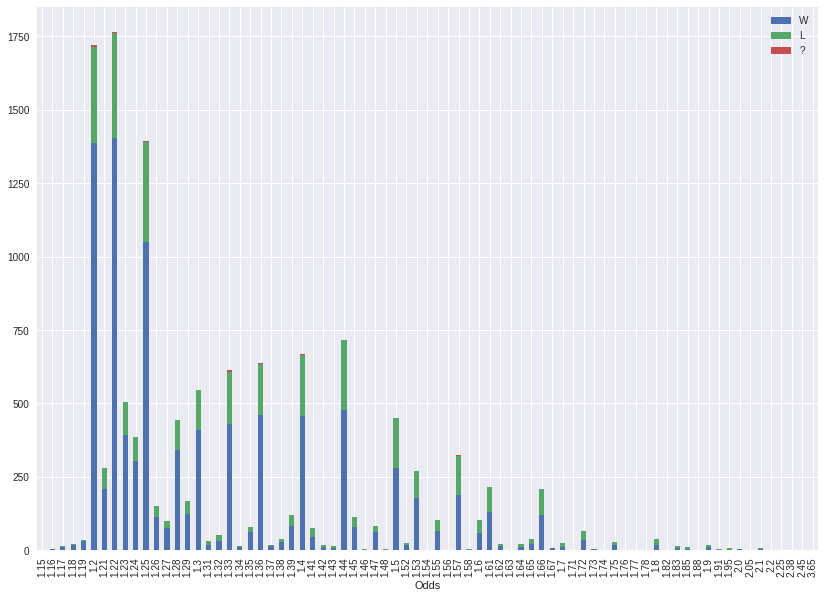

In [116]:
plot_status(by='Odds', relative=False, labels=False)

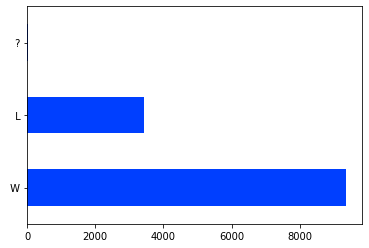

In [9]:
t.df.Status.value_counts().plot(kind='barh')